In [4]:
from starling_rhythm.utils.paths import PROCESSED_DIR

In [6]:
bID = 's_b1555_22'

In [9]:
shuffle_DIR = PROCESSED_DIR / bID / 'templatingFalse-shuffle'
wavs = list(shuffle_DIR.glob('*.wav'))

In [11]:
tester = wavs[0]

## MFDFA does not change when signal is constant

In [24]:
from starling_rhythm.utils.audio import extract_amp_env
import scipy
import pathlib2

In [25]:
waveform = tester
amp_env_sr = 200
win_type = 'boxcar' 
res_type = 'linear'
stds = 1
compact = False
buffer = 100

In [26]:
if type(waveform) == pathlib2.PosixPath:
    sr, waveform = scipy.io.wavfile.read(waveform)

In [27]:
amp_env = extract_amp_env(
        waveform, 
        target_sr = amp_env_sr, 
        win_type = win_type,
        res_type = res_type,
        stds = stds, 
        buffer = buffer,
        spl = True,
        compact = compact)

In [30]:
import matplotlib.pyplot as plt

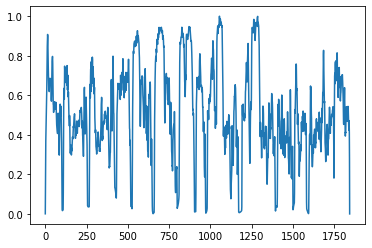

In [31]:
plt.plot(amp_env)

In [33]:
from starling_rhythm.mfdfa import hurst_expo

In [39]:
time_window_cnt = 50
q_min = 0.5
q_max = 5
q_num = 10

In [42]:
## calculate empirical hurst_expos
h_expos = hurst_expo(
    amp_env,
    time_window_cnt = time_window_cnt, 
    q_min = q_min, 
    q_max = q_max, 
    q_num = q_num    
)
    
## MF_range
empirical_MF_range = max(h_expos) - min(h_expos)

In [43]:
empirical_MF_range

0.20337189113563747

In [46]:
import numpy as np

In [49]:
ranges = []

for i in np.arange(0, 10):
    expos = hurst_expo(
        amp_env,
        time_window_cnt = time_window_cnt, 
        q_min = q_min, 
        q_max = q_max,
        q_num = q_num
    )
    ranges.append(empirical_MF_range)
    

In [51]:
ranges

[0.20337189113563747,
 0.20337189113563747,
 0.20337189113563747,
 0.20337189113563747,
 0.20337189113563747,
 0.20337189113563747,
 0.20337189113563747,
 0.20337189113563747,
 0.20337189113563747,
 0.20337189113563747]